In [103]:
import pandas as pd
import numpy as np
import os
import random

from matplotlib.image import imread
from matplotlib import pyplot
from IPython.display import Image
from PIL import Image as arrImage

DATA_DIR = "../data/leedsbutterfly"
DESC_DIR = DATA_DIR + "/descriptions/"
IMG_DIR = DATA_DIR + "/images/"
OUTFILE = "../data/dataframe.csv"

print("Setup all imports")

Setup all imports


In [80]:
temp = {
    "Name": [],
    "Scientific Name": [],
    "Description": [],
    "Image Files": [],
    "Image Arrays": []
}
for f in os.listdir(DESC_DIR):
    file_dir = DESC_DIR + f"/{f}"
    with open(file_dir, 'r') as d:
        lines = d.readlines()
        temp["Scientific Name"].append(lines[0].strip())
        temp["Name"].append(lines[1].strip())
        temp["Description"].append(lines[2].strip())
    temp["Image Files"].append([i for i in os.listdir(IMG_DIR) if i.startswith(f[:3])])
    temp["Image Arrays"].append([imread(IMG_DIR + temp["Image Files"][-1][-i]) for i in range(len(temp["Image Files"]))])
temp

{'Name': ['Crimson-patched Longwing',
  'Zebra Longwing',
  'Monarch',
  'American Copper',
  'Common Buckeye',
  'Painted Lady',
  'Mourning Cloak',
  'Giant Swallowtail',
  'Red Admiral',
  'Cabbage White'],
 'Scientific Name': ['Heliconius erato',
  'Heliconius charitonius',
  'Danaus plexippus',
  'Lycaena phlaeas',
  'Junonia coenia',
  'Vanessa cardui',
  'Nymphalis antiopa',
  'Papilio cresphontes',
  'Vanessa atalanta',
  'Pieris rapae'],
 'Description': ['3-3 3/8" (76-86 mm). Wings long, narrow, and rounded. Black above, crossed on FW by broad crimson patch, and on HW by narrow yellow line. Below, similar but red is pinkish and HW has less yellow.',
  '3-3 3/8" (76-78 mm). Wings long and narrow. Jet-black above, banded with lemon-yellow (sometimes pale yellow). Beneath similar; bases of wings have crimson spots.',
  '3 1/2-4" (89-102 mm). Very large, with FW long and drawn out. Above, bright, burnt-orange with black veins and black margins sprinkled with white dots; FW tip bro

In [81]:
df = pd.DataFrame(temp, index=[i+1 for i in range(10)])
df

,Name,Scientific Name,Description,Image Files,Image Arrays
1,Crimson-patched Longwing,Heliconius erato,"3-3 3/8"" (76-86 mm). Wings long, narrow, and r...","[0030061.png, 0030049.png, 0030048.png, 003006...","[[[[0.02352941 0.01960784 0.01176471], [0.0274..."
2,Zebra Longwing,Heliconius charitonius,"3-3 3/8"" (76-78 mm). Wings long and narrow. Je...","[0020104.png, 0020110.png, 0020138.png, 002007...","[[[[0.11764706 0.1882353 0.03921569], [0.1176..."
3,Monarch,Danaus plexippus,"3 1/2-4"" (89-102 mm). Very large, with FW long...","[0010004.png, 0010010.png, 0010038.png, 001003...","[[[[1. 1. 1.], [1. 1. 1.], [1. 1. 1.], [1. 1. ..."
4,American Copper,Lycaena phlaeas,"7/8-1 1/8"" (22-28 mm). Above, FW bright copper...","[0050030.png, 0050024.png, 0050018.png, 005001...","[[[[0.28235295 0.5058824 0.1254902 ], [0.3333..."
5,Common Buckeye,Junonia coenia,"2-2 1/2"" (51-63 mm). Wings scalloped and round...","[0040155.png, 0040141.png, 0040169.png, 004003...","[[[[0.00392157 0.00784314 0. ], [0.0117..."
6,Painted Lady,Vanessa cardui,"2-2 1/4"" (51-57 mm). FW tip extended slightly,...","[0100029.png, 0100175.png, 0100149.png, 010014...","[[[[0.52156866 0.5176471 0.44705883], [0.5215..."
7,Mourning Cloak,Nymphalis antiopa,"2 7/8-3 3/8"" (73-86 mm). Large. Wing margins r...","[0060050.png, 0060087.png, 0060093.png, 006011...","[[[[0.5882353 0.40784314 0.21176471], [0.5372..."
8,Giant Swallowtail,Papilio cresphontes,"3 3/8-5 1/2"" (86-140 mm). Very large. Long, da...","[0070055.png, 0070069.png, 0070096.png, 007008...","[[[[0.00784314 0.00392157 0.02352941], [0.0078..."
9,Red Admiral,Vanessa atalanta,"1 3/4-2 1/4"" (44-57 mm). FW tip extended, clip...","[0090162.png, 0090176.png, 0090201.png, 009021...","[[[[0.8509804 0.7137255 0.6039216], [0.8509804..."
10,Cabbage White,Pieris rapae,"1 1/4-1 7/8"" (32-48 mm). Milk-white above with...","[0080007.png, 0080013.png, 0080012.png, 008000...","[[[[0.23137255 0.14901961 0.04313726], [0.2039..."


Painted Lady
Vanessa cardui
2-2 1/4" (51-57 mm). FW tip extended slightly, rounded. Above, salmon-orange with black blotches, black-patterned margins, and broadly black FW tips with clear white spots; outer HW crossed by small black-rimmed blue spots. Below, FW dominantly rose-pink with olive, black, and white pattern; HW has small blue spots on olive background with white webwork. FW above and below has white bar running from costa across black patch near tip.


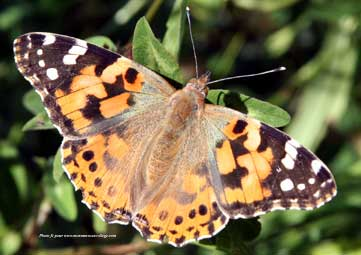

In [115]:
# This cell is solely to test how our DataFrame is structured and how to use it
species = df.iloc[random.randint(0,9)]
image = IMG_DIR + random.choice(species["Image Files"])

print(species["Name"])
print(species["Scientific Name"])
print(species["Description"])
Image(filename=image)

In [112]:
# Save the new DataFrame
df.to_csv(OUTFILE)
print(f"Saved the file to {OUTFILE}")

Saved the file to ../data/dataframe.csv


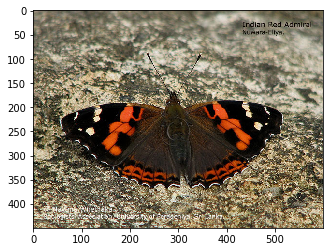

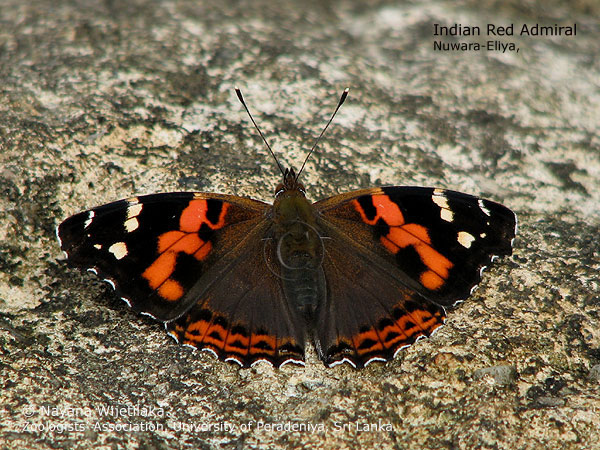

In [116]:
pyplot.imshow(species["Image Arrays"][0])
pyplot.show()
Image(filename=IMG_DIR + species["Image Files"][0])

In [118]:
shape = species["Image Arrays"][0].shape
if shape[2] == 3:
    print("This is an RGB file")

This is an RGB file
